In [2]:
import torch
from torch import nn
import torchvision.models as models
import PIL
import torchvision.transforms as transforms

In [3]:
## load a vgg16 model
vgg16 = models.vgg16()

In [5]:
class VGG16(nn.Module):
    def __init__(self):
        super.__init__()
        self.block1_cnn1 = nn.Conv2d(in_channels=3,out_channels=64,kernel_size=(3,3),stride=1,padding=1)
        self.block1_cnn2 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=(3,3),stride=1,padding=1)
        self.pool = nn.MaxPool2d(kernel_size=(2,2),stride=2)
        self.relu = nn.ReLU()
        ## Write the code for 2nd and 3rd block
        self.block2_cnn1 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(3,3),stride=1,padding=1)
        self.block2_cnn2 = nn.Conv2d(in_channels=128,out_channels=128,kernel_size=(3,3),stride=1,padding=1)
        ## block3
        self.block3_cnn1 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=(3,3),stride=1,padding=1)
        self.block3_cnn2 = nn.Conv2d(in_channels=256,out_channels=256,kernel_size=(3,3),stride=1,padding=1)
    def forward(self,x):
        x = self.block1_cnn1(x)
        x = self.relu(x)
        x = self.block1_cnn2(x)
        x = self.relu(x)
        x = self.pool(x)
        ## Write the code for 2nd block
        x = self.block2_cnn1(x)
        x = self.relu(x)
        x = self.block2_cnn2(x)
        x = self.relu(x)
        x = self.pool(x)
        ## 3rd block
        x = self.block3_cnn1(x)
        x = self.relu(x)
        x = self.block3_cnn2(x)
        x = self.relu(x)
        x = self.block3_cnn2(x)
        x = self.relu(x)
        x = self.pool(x)
        
        
        
        

In [6]:
vgg16 = models.vgg16() ## randomly initialized weights

In [7]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
## Pretrained VGG16 model
vgg16 = models.vgg16(pretrained=True)## imagenet dataset, 

In [9]:
### Read the image
img = PIL.Image.open("../Codes/imgs/elephant.jpg")

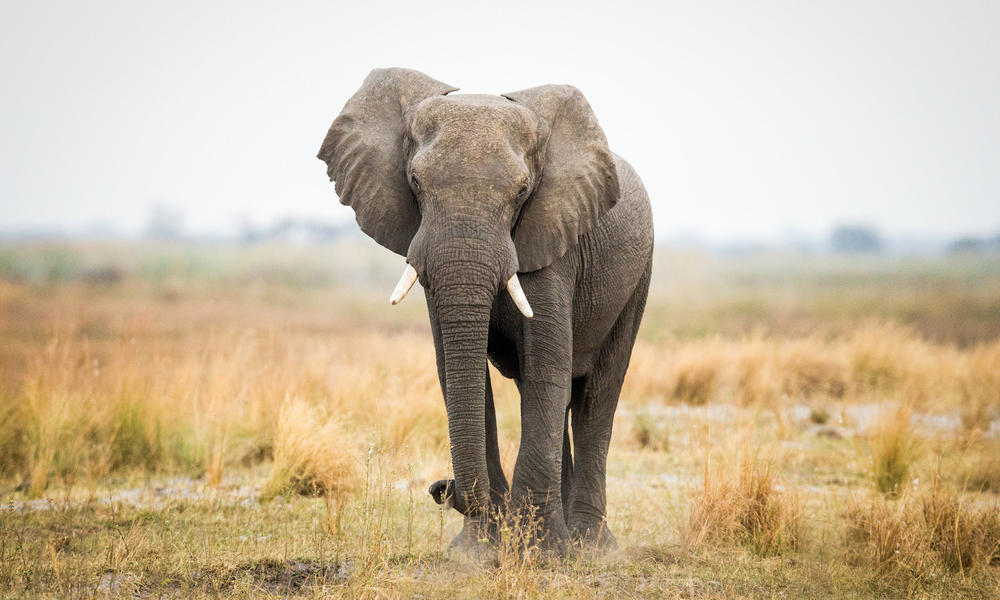

In [10]:
img

In [11]:
## Transform the data, before it is fed to the model
transform_pipeline = transforms.Compose(
                                        [transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])]
)

In [12]:
img_mod = transform_pipeline(img)

In [14]:
img_mod.shape ## C,H,W

torch.Size([3, 600, 1000])

In [15]:
img_mod=img_mod.unsqueeze(0)
img_mod.shape

torch.Size([1, 3, 600, 1000])

In [23]:
preds=vgg16(img_mod) ## A model will expect the input to be of form B,C,H,W

In [17]:
preds.shape

torch.Size([1, 1000])

In [24]:
preds.argmax()

tensor(101)

In [20]:
import pandas as pd
labels = pd.read_csv("../Codes/data/vgg16_model_labels.csv",header=None)
labels.head()

,0,1
0,0,"tench, Tinca tinca"
1,1,"goldfish, Carassius auratus"
2,2,"great white shark, white shark, man-eater, man..."
3,3,"tiger shark, Galeocerdo cuvieri"
4,4,"hammerhead, hammerhead shark"


In [21]:
labels.iloc[101]

0       101
1    tusker
Name: 101, dtype: object

In [22]:
labels.iloc[386]

0                                     386
1    African elephant, Loxodonta africana
Name: 386, dtype: object

In [25]:
import numpy as np

In [26]:
l1 = torch.tensor([0,1,2])
l2 = torch.tensor([4,5,6])

In [28]:
torch.stack([l1,l2]).shape

torch.Size([2, 3])

In [29]:
l1.shape

torch.Size([3])

In [30]:
import torchvision

In [31]:
torchvision.__version__

'0.11.2'

In [32]:
preds.argsort()

tensor([[927, 933, 403, 829, 963, 800, 547, 320, 592, 874, 398, 476, 669, 509,
         959, 406, 934, 926, 495, 922, 935, 687, 415, 788, 928, 466, 324, 520,
         962, 736,  72, 923, 809, 679, 865, 969, 300, 564,  77, 762, 950, 555,
         967, 964, 942, 685, 648, 961,  94, 454,  75, 629, 989, 565, 325, 455,
         709, 551, 712, 886, 582, 957, 493, 408, 519, 323, 534, 467, 530, 508,
         521, 115,  70, 338,  74, 309,   6, 908, 550, 945, 896, 931, 446, 496,
         823, 734, 321, 481, 729, 333, 624, 810, 778, 569, 659, 960, 705, 925,
         941, 781, 579, 949, 794, 642, 688, 814, 773,  13, 920, 450, 526, 396,
         301, 108, 625, 607, 771, 303,  31, 714, 485, 645, 317, 411, 640, 752,
         986, 532, 952, 576, 631, 845, 909, 854, 443, 948, 647, 868, 985, 283,
         393, 628,  57, 799, 503, 528, 308, 510, 943, 478, 864,  76, 289, 644,
         533, 760, 304, 612, 492, 803, 468, 580, 929,  12, 692, 966, 936, 431,
          14, 878, 599, 745, 397, 436, 847, 407, 204

In [35]:
preds[0][101]

tensor(10.1215, grad_fn=<SelectBackward0>)

In [36]:
preds[0][386]

tensor(10.0568, grad_fn=<SelectBackward0>)

In [40]:
wts = [l for l in vgg16.parameters()]

### Understand how conv layers are feature extractors

In [45]:
l = [c for c in vgg16.children()]

In [47]:
len(l)

3

In [48]:
l[0] ## conv block

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [51]:
l[0][0:7]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
)

In [125]:
lst = list(l[0][0:7])
features = nn.Sequential(*lst)(img_mod)

In [126]:
features.shape

torch.Size([1, 128, 300, 500])

In [127]:
f_n = features.detach().numpy()

In [128]:
f_n.shape

(1, 128, 300, 500)

In [129]:
f_n[0,0,:,:].shape

(300, 500)

In [130]:
import matplotlib.pyplot as plt

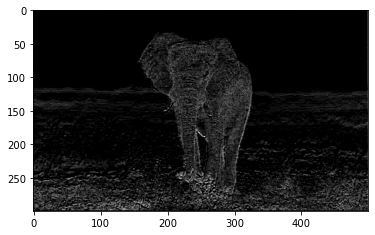

In [131]:
plt.imshow(f_n[0,2,:,:],cmap="gray")

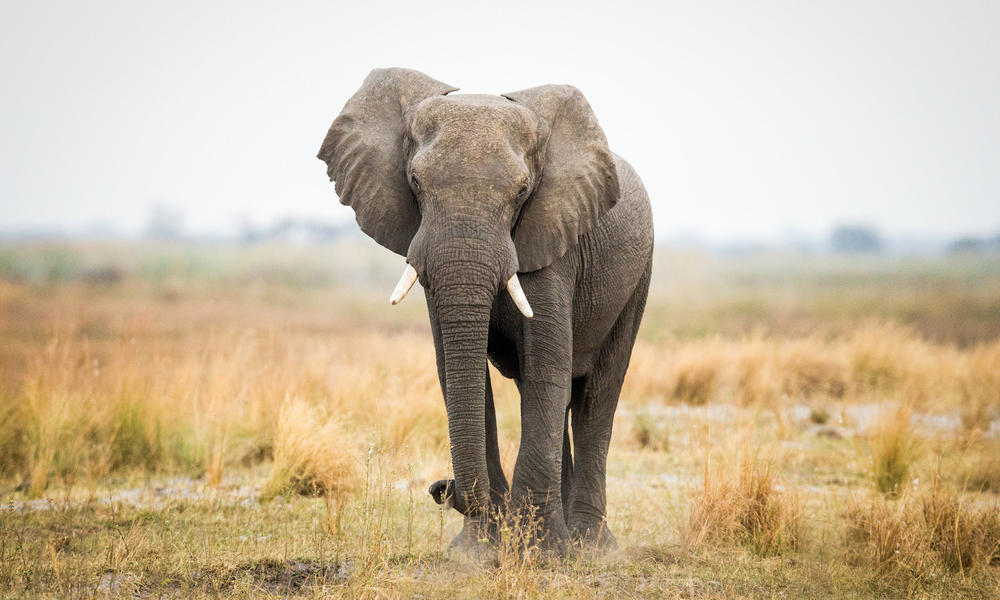

In [73]:
img

In [135]:
### Custom Classsifier
img.height

600

In [136]:
img.width

1000

In [139]:
import os
def get_dims(path):
    heights,widths = [],[]
    file_names = os.listdir(path)
    for name in file_names:
        path_file = os.path.join(path,name)
        img = PIL.Image.open(path_file)
        h,w = img.height, img.width
        heights.append(h)
        widths.append(w)
    data = {'ht':heights,'wd':widths}
    return pd.DataFrame(data).describe()

In [140]:
path = "/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data/waffle_pancakes/train/pancakes"
get_dims(path=path)

,ht,wd
count,375.000000,375.000000
mean,203.090667,249.882667
std,31.508972,36.444333
min,124.000000,160.000000
25%,183.000000,225.000000
50%,194.000000,259.000000
75%,225.000000,275.000000
max,290.000000,405.000000


In [141]:
path = "/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data/waffle_pancakes/test/pancakes"
get_dims(path=path)

,ht,wd
count,161.000000,161.000000
mean,201.416149,251.596273
std,29.954248,36.423615
min,136.000000,136.000000
25%,183.000000,225.000000
50%,192.000000,260.000000
75%,217.000000,275.000000
max,276.000000,354.000000


In [142]:
path = "/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data/waffle_pancakes/train/waffles"
get_dims(path=path)

,ht,wd
count,572.000000,572.000000
mean,202.886364,250.337413
std,33.252355,38.135253
min,108.000000,112.000000
25%,183.000000,225.000000
50%,194.000000,259.000000
75%,225.000000,275.000000
max,280.000000,370.000000


In [143]:
path = "/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data/waffle_pancakes/test/waffles"
get_dims(path=path)

,ht,wd
count,245.000000,245.000000
mean,198.330612,256.269388
std,30.417466,35.042844
min,130.000000,134.000000
25%,183.000000,231.000000
50%,188.000000,266.000000
75%,205.000000,275.000000
max,276.000000,386.000000


In [145]:
### Create our pipeline to transform the data
transform_pipeline = transforms.Compose(
                                        [transforms.Resize((160,160)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])]
)

In [146]:
path_train = "/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data/waffle_pancakes/train"
path_test = "/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data/waffle_pancakes/test"

In [147]:
data_train = torchvision.datasets.ImageFolder(path_train,transform=transform_pipeline)

In [148]:
data_train.classes

['pancakes', 'waffles']

In [149]:
from torch.utils.data import DataLoader

In [150]:
data_train_batched = DataLoader(data_train,batch_size=1)

In [151]:
### Assemble the model
vgg16 = models.vgg16(pretrained=True)

In [156]:
### Freeze the weights of all the layers
for parameter in vgg16.parameters():
    parameter.requires_grad = False

In [157]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [162]:
### Change the top layer/linear block/classifier
l = [c for c in vgg16.children()]
class FeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_extractor = nn.Sequential(*list(l[0][0:-1]))
    def forward(self,X):
        x = self.feature_extractor(X)
        return x

In [163]:
fe = FeatureExtractor()

In [164]:
test_img = torch.rand(size=(1,3,160,160))

In [166]:
fe(test_img).shape

torch.Size([1, 512, 10, 10])

In [178]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_extractor = nn.Sequential(*list(l[0][0:-1]))
        self.classifier = nn.Sequential(nn.Linear(in_features=512*10*10,out_features=256),
                                        nn.ReLU(),
                                        nn.Linear(in_features = 256, out_features=64),
                                        nn.ReLU(),
                                        nn.Linear(in_features=64, out_features=2),
                                        nn.Softmax())       
    
    def forward(self,x):
        x = self.feature_extractor(x)
        x = x.view(-1,512*10*10)
        x = self.classifier(x)
        return x
        

In [179]:
model = CustomModel()

In [180]:
model

CustomModel(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padd

In [181]:
for p in model.parameters():
    print(p.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True


In [182]:
## Write the training loop
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
optim_model = optim.SGD(model.classifier.parameters(),lr=0.01)

In [184]:
epochs = 1
for epoch in range(epochs):
    for inputs,labels in data_train_batched:
        probs = model(inputs)
        loss = loss_fn(probs,labels)
        loss.backward()
        optim_model.step()
        optim_model.zero_grad()
        print(f"Loss: {loss.item()}")

/Users/gunnvantsaini/miniforge3/envs/dl/lib/python3.9/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Loss: 0.6826979517936707
Loss: 0.609404444694519
Loss: 0.5052802562713623
Loss: 0.39124712347984314
Loss: 0.35853201150894165
Loss: 0.377591997385025
Loss: 0.42313480377197266
Loss: 0.33430537581443787
Loss: 0.3393351137638092
Loss: 0.39592722058296204
Loss: 0.4091467261314392
Loss: 0.31696227192878723
Loss: 0.32261642813682556
Loss: 0.34950438141822815
Loss: 0.3471299111843109
Loss: 0.3202779293060303
Loss: 0.3202987015247345
Loss: 0.3150060772895813
Loss: 0.31982842087745667
Loss: 0.3260059058666229
Loss: 0.36765915155410767
Loss: 0.3779185712337494
Loss: 0.32074806094169617
Loss: 0.3221542537212372
Loss: 0.3216273784637451
Loss: 0.356558233499527
Loss: 0.32117760181427
Loss: 0.3371189832687378
Loss: 0.31450024247169495
Loss: 0.3158815801143646
Loss: 0.31427937746047974
Loss: 0.3357177674770355
Loss: 0.3150220811367035
Loss: 0.31619903445243835
Loss: 0.32647380232810974
Loss: 0.31455159187316895
Loss: 0.3182874321937561
Loss: 0.3148719072341919
Loss: 0.3375481963157654
Loss: 0.316478

In [ ]:
## Prediction: psuedo code
pred_labels = []
act_labels = []
for inputs,labels in data_test_batched:
    probs = model(inputs)
    pred_label = probs.argmax()
    pred_labels.append(pred_label)
    actual_labels.append(labels)